In [2]:
import csv
import os
from typing import Dict, List, Union

import numpy as np
import pandas as pd
from tqdm import tqdm
import math
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from transformers import AutoTokenizer, AutoConfig, AutoModel, PreTrainedModel
from ex_params import (
    DATA_AI_PATH,
    DATA_HUMAN_PATH,
    DATASETS,
    DATASETS_PATH,
    STATS_PATH,
    SEED,
    BASELINE_MODELS,
    TRAINING_HISTORY_PATH,
)
from ex_utils import get_csv_paths
from models import BaselineClassifier

In [4]:
df1 = pd.read_csv(TRAINING_HISTORY_PATH + "baseline/training_history_baseline_mini_master-mini.csv")
df2 = pd.read_csv(TRAINING_HISTORY_PATH + "baseline/training_history_baseline_notrick_mini_master-mini.csv")
df3 = pd.read_csv(TRAINING_HISTORY_PATH + "baseline/training_history_baseline_encoder_mini_master-mini.csv")
df4 = pd.read_csv(TRAINING_HISTORY_PATH + "baseline/training_history_baseline_encoder_notrick_mini_master-mini.csv")
df1.head()

,epoch,train_loss,val_loss,val_accuracy,val_balanced_accuracy,val_precision,val_recall,val_f1,val_auc
0,1,0.363337,0.522604,0.871824,0.869310,0.827103,0.949981,0.884294,0.952877
1,2,0.221898,0.387889,0.929287,0.929204,0.931062,0.931843,0.931453,0.981615
2,3,0.167954,0.359268,0.933926,0.933732,0.932440,0.939951,0.936180,0.983180
3,4,0.151062,0.353679,0.939023,0.938592,0.930901,0.952430,0.941542,0.984765
4,5,0.124544,0.300269,0.947851,0.948099,0.957951,0.940120,0.948952,0.988475


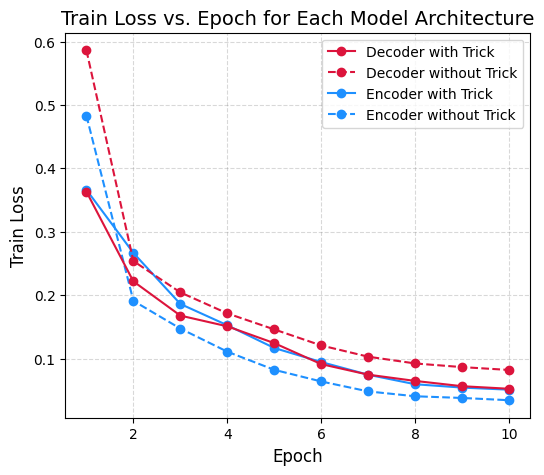

In [42]:
plt.figure(figsize=(6, 5))
plt.title("Training Loss Comparison", fontsize=14)
plt.plot(df3["epoch"], df3["train_loss"], label="Encoder with Trick", marker='o', color="dodgerblue")
plt.plot(df4["epoch"], df4["train_loss"], label="Encoder without Trick", marker='o', linestyle='--', color="dodgerblue")
plt.plot(df1["epoch"], df1["train_loss"], label="Decoder with Trick", marker='o', color='crimson')
plt.plot(df2["epoch"], df2["train_loss"], label="Decoder without Trick", marker='o',linestyle='--', color="crimson")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Train Loss", fontsize=12)
plt.title("Train Loss vs. Epoch for Each Model Architecture", fontsize=14)
handles, labels = plt.gca().get_legend_handles_labels()

# Desired order
order = [2, 3, 0, 1]

# Reorder handles and labels
handles = [handles[i] for i in order]
labels = [labels[i] for i in order]

# Add legend with custom order
plt.legend(handles, labels)

# Show only horizontal grid lines
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.show()

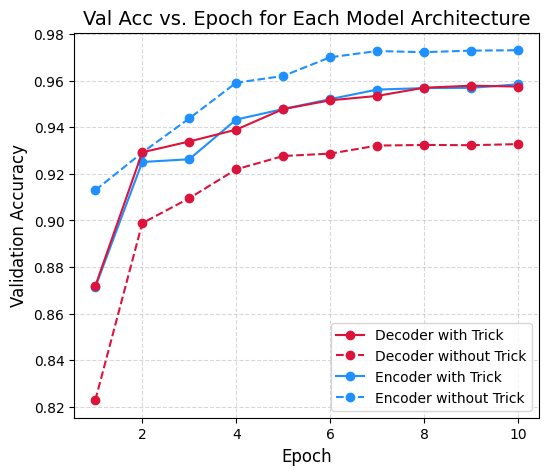

In [50]:
plt.figure(figsize=(6, 5))
plt.plot(df3["epoch"], df3["val_accuracy"], label="Encoder with Trick", marker='o', color="dodgerblue")
plt.plot(df4["epoch"], df4["val_accuracy"], label="Encoder without Trick", marker='o', linestyle='--', color="dodgerblue")
plt.plot(df1["epoch"], df1["val_accuracy"], label="Decoder with Trick", marker='o', color='crimson')
plt.plot(df2["epoch"], df2["val_accuracy"], label="Decoder without Trick", marker='o',linestyle='--', color="crimson")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.title("Val Acc vs. Epoch for Each Model Architecture", fontsize=14)
handles, labels = plt.gca().get_legend_handles_labels()

# Desired order
order = [2, 3, 0, 1]

# Reorder handles and labels
handles = [handles[i] for i in order]
labels = [labels[i] for i in order]

# Add legend with custom order
plt.legend(handles, labels)

# Show only horizontal grid lines
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.show()